In [1]:
import pandas as pd
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2

from urllib import request
import urllib
from io import BytesIO
import numpy as np
from skimage import io
from tqdm import tqdm


In [2]:
csvFile_path = glob("./*.csv")[1]

In [3]:
df = pd.read_csv(csvFile_path)
test_url = df["IMG_URL"][0]

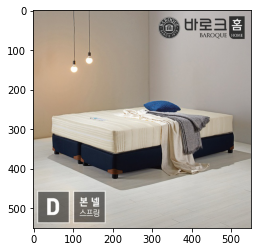

In [4]:
image = io.imread(test_url)
plt.imshow(image)

In [ ]:
imgs = []

for i in tqdm(df.index):
    try:
        with request.urlopen(df["IMG_URL"][i]) as res:
            img = np.array(Image.open(BytesIO(res.read())))
            imgs.append(list(img.flatten()))
    except:
        imgs.append(np.nan)

In [ ]:
df2 = df.copy()
df2["IMG"] = imgs



In [ ]:
plt.imshow(df2["IMG"][0])

In [ ]:
df2.to_csv("product_with_imageMatrix.csv", index=False)